In [65]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Estefania Zapata
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

In [66]:
import numpy as np
from scipy.interpolate import lagrange, CubicHermiteSpline
import matplotlib.pyplot as plt
import sympy as sp



In [67]:
x_vals = [0, np.pi/2, np.pi]
y_vals = [np.sin(xi) for xi in x_vals]

Polinomio_Lagrange = lagrange(x_vals, y_vals)

n = len(x_vals) - 1
x = sp.symbols('x')
f = sp.sin(x)
f_derivada = f.diff(x, n + 1)
ξ = sp.Symbol('ξ')  # símbolo para el punto desconocido ξ
error_lagrange = (f_derivada.subs(x, ξ) / sp.factorial(n + 1))
for xi in x_vals:
    error_lagrange *= (x - xi)
error_lagrange = sp.simplify(error_lagrange)

print("--- Interpolación de Lagrange ---")
print(f"Aproximación: {Polinomio_Lagrange}")
print(f"Error absoluto: {error_lagrange}")


--- Interpolación de Lagrange ---
Aproximación:          2
-0.4053 x + 1.273 x
Error absoluto: -x*(x - 3.14159265358979)*(x - 1.5707963267949)*cos(ξ)/6


In [68]:
x_eval = np.pi / 4
aprox_lagrange = Polinomio_Lagrange(x_eval)
real_val = np.sin(x_eval)
print(f"Valor real: {real_val}")
print(f"Valor interpolado: {aprox_lagrange}")
print(f"Error absoluto en π/4: {abs(real_val - aprox_lagrange)}")


Valor real: 0.7071067811865475
Valor interpolado: 0.75
Error absoluto en π/4: 0.04289321881345254


In [69]:

df = [np.cos(xi) for xi in x_vals]
polinomio_hermite = CubicHermiteSpline(x_vals, y_vals, df)

m = len(x_vals)
f_2_deriv = f.diff(x, 2 * m)
error_hermite = (f_2_deriv.subs(x, ξ) / sp.factorial(2 * m))
for xi in x_vals:
    error_hermite *= (x - xi)**2
error_hermite = sp.simplify(error_hermite)

print("--- Interpolación Hermite---")
print(f"Aproximación: {polinomio_hermite}")
print(f"Error absoluto: {error_hermite}")


--- Interpolación Hermite---
Aproximación: <scipy.interpolate._cubic.CubicHermiteSpline object at 0x7c0b9ea29010>
Error absoluto: -0.0338226010534731*x**2*(0.318309886183791*x - 1)**2*(0.636619772367581*x - 1)**2*sin(ξ)


In [70]:
x_eval = np.pi / 4
aprox_hermite = polinomio_hermite(x_eval)
real_val = np.sin(x_eval)
print(f"Valor real: {real_val}")
print(f"Valor interpolado con Hermite: {aprox_hermite}")
print(f"Error absoluto en π/4: {abs(real_val - aprox_hermite)}")

Valor real: 0.7071067811865475
Valor interpolado con Hermite: 0.6963495408493621
Error absoluto en π/4: 0.010757240337185392


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [71]:
E = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

# Parámetros
E_r = 78
Gamma = 55
sigma_0 = max(sigma_exp) * ((Gamma**2)/4 + (E_r - 78)**2)

def seccion_eficaz(E):
    return sigma_0 / ((E - E_r)**2 + (Gamma**2 / 4))


In [72]:
def newton_interpolate(x_data, y_data, x_interp):
    """
    Interpolación por diferencias divididas de Newton.
    x_data: puntos conocidos (x)
    y_data: valores conocidos (f(x))
    x_interp: valor donde se desea interpolar
    """
    n = len(x_data)

    F = np.zeros((n, n))
    F[:, 0] = y_data

    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i + 1, j - 1] - F[i, j - 1]) / (x_data[i + j] - x_data[i])

    result = F[0, 0]
    product = 1.0
    for j in range(1, n):
        product *= (x_interp - x_data[j - 1])
        result += F[0, j] * product

    return result


In [73]:
newton_polinomio = newton_interpolate(E, sigma_exp, E)
lagrange_polinomio= lagrange(E, sigma_exp)

derivada = np.gradient(sigma_exp, E)
hermite_polinomio = CubicHermiteSpline(E, sigma_exp, derivada)


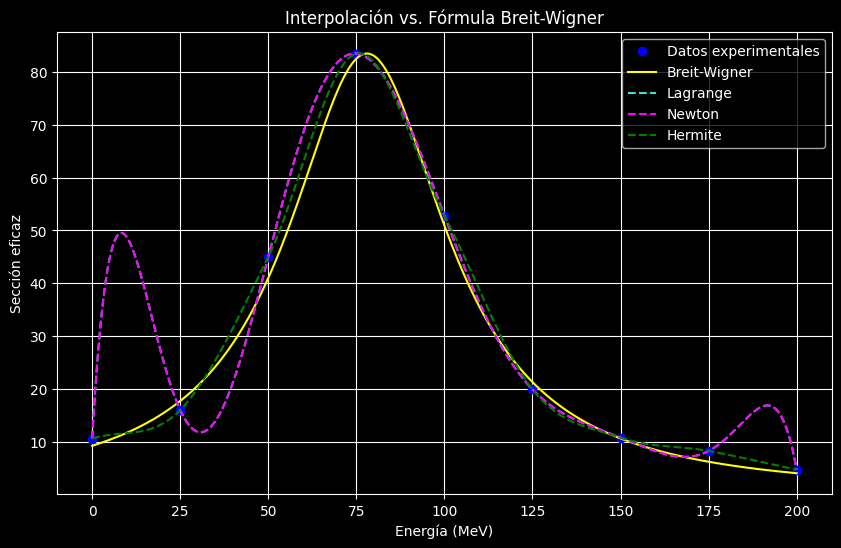

In [74]:
Energias = np.linspace(0, 200, 500)
real_vals = seccion_eficaz(Energias)
lagrange_vals = lagrange_polinomio(Energias)
newton_vals = np.array([newton_interpolate(E, sigma_exp, xi) for xi in Energias])
hermite_vals = hermite_polinomio(Energias)

# Gráfico
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
plt.plot(E, sigma_exp, 'o', label='Datos experimentales', color='blue')
plt.plot(Energias, real_vals, label='Breit-Wigner', color ='yellow')
plt.plot(Energias, lagrange_vals, '--', label='Lagrange', color = 'turquoise')
plt.plot(Energias, newton_vals, '--', label='Newton', color='magenta')
plt.plot(Energias, hermite_vals, '--', label='Hermite', color='green')
plt.legend()
plt.xlabel('Energía (MeV)')
plt.ylabel('Sección eficaz')
plt.title('Interpolación vs. Fórmula Breit-Wigner')
plt.grid()
plt.show()


In [75]:
error_lagrange = np.max(np.abs(real_vals - lagrange_vals))
error_newton = np.max(np.abs(real_vals - newton_vals))
error_hermite = np.max(np.abs(real_vals - hermite_vals))

print(f"Error máximo Lagrange: {error_lagrange:.3f}")
print(f"Error máximo Newton: {error_newton:.3f}")
print(f"Error máximo Hermite: {error_hermite:.3f}")


Error máximo Lagrange: 38.337
Error máximo Newton: 38.337
Error máximo Hermite: 4.629


El método de Hermite es el que presenta el menor error máximo entre los tres métodos evaluados. Esto significa que, para el conjunto de datos Hermite aproxima mejor la función original f(x) que los métodos de Lagrange y Newton.

# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

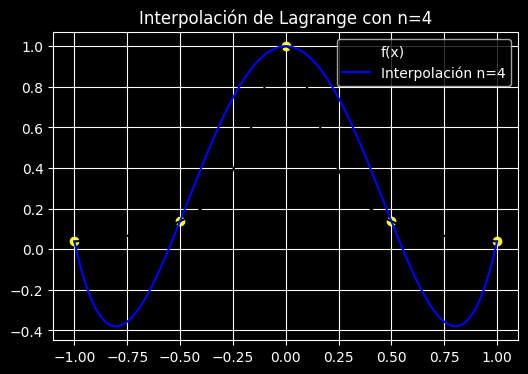

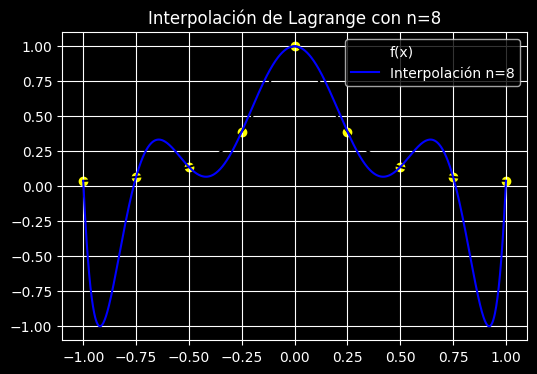

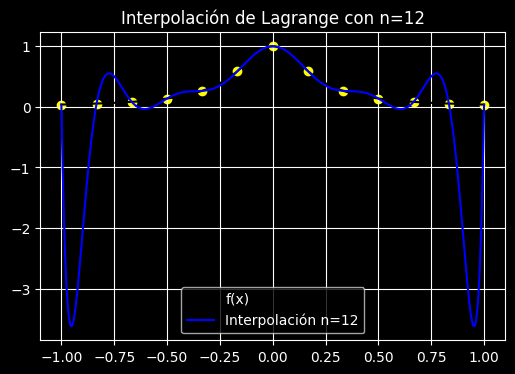

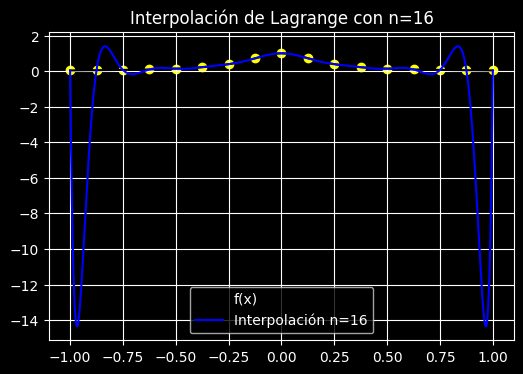

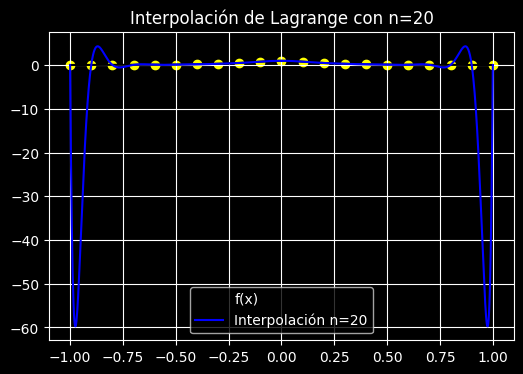

In [84]:
def funcion(x):
    return 1 / (1 + 25 * x**2)

x_vals = np.linspace(-1, 1, 1000)
y_vals = funcion(x_vals)

n_vals = [4, 8, 12, 16, 20]

for n in n_vals:
    x_s = np.linspace(-1, 1, n + 1)
    y_s = funcion(x_s)

    poly = lagrange(x_s, y_s)
    y_interp = poly(x_vals)

    plt.figure(figsize=(6,4))
    plt.style.use('dark_background')
    plt.plot(x_vals, y_vals, 'k', label='f(x)')
    plt.plot(x_vals, y_interp, label=f'Interpolación n={n}', color='blue')
    plt.scatter(x_s, y_s, c='yellow')
    plt.title(f'Interpolación de Lagrange con n={n}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [85]:
x = sp.Symbol('x')
fx = 1 / (1 + 25 * x**2)

n = 4
derivada = fx

for i in range(n + 1):
    derivada = sp.diff(derivada, x)

#derivada en x = 0.5
punto = 0.5
cota_error = derivada.subs(x, punto) / sp.factorial(n + 1)
print(cota_error.evalf())


"x = sp.Symbol('x')\nfx = 1 / (1 + 25 * x**2)\n\nn = 4\nderivada = fx\n\nfor i in range(n + 1):\n    derivada = sp.diff(derivada, x)\n\n#derivada en x = 0.5\npunto = 0.5\ncota_error = derivada.subs(x, punto) / sp.factorial(n + 1)\nprint(cota_error.evalf())\n"

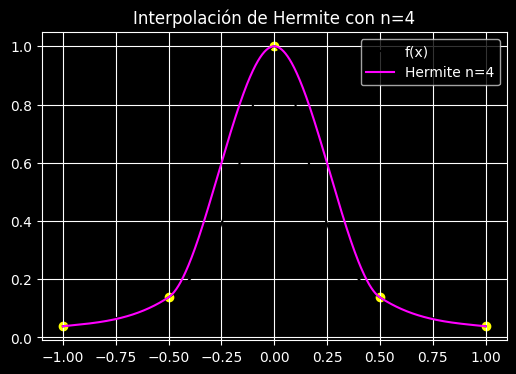

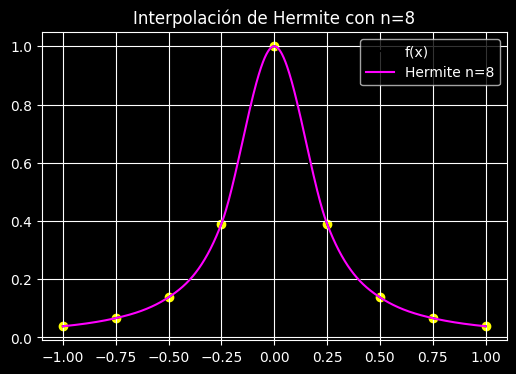

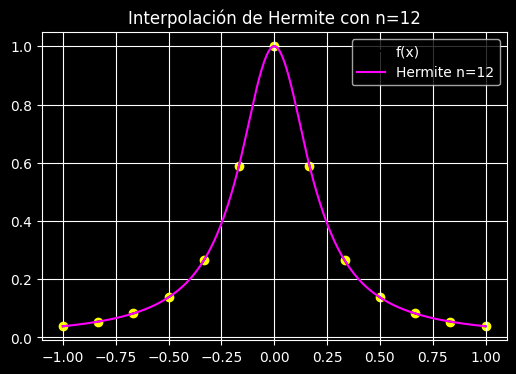

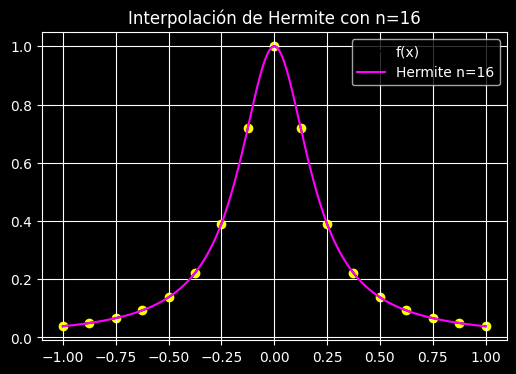

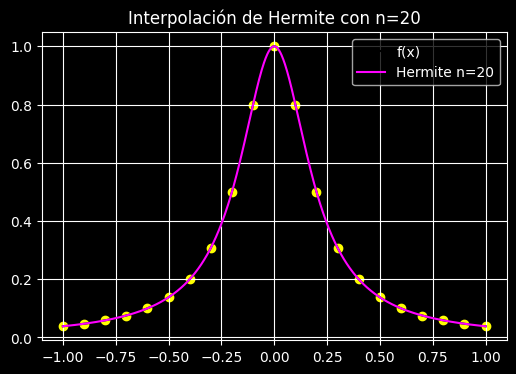

In [86]:
def df(x):
    return (-50 * x) / (1 + 25 * x**2)**2

for n in n_vals:
    x_s = np.linspace(-1, 1, n + 1)
    y_s = funcion(x_s)
    dy_s = df(x_s)

    hermite_poly = CubicHermiteSpline(x_s, y_s, dy_s)
    y_hermite = hermite_poly(x_vals)

    plt.figure(figsize=(6,4))
    plt.plot(x_vals, y_vals, 'k', label='f(x)')
    plt.plot(x_vals, y_hermite, label=f'Hermite n={n}', color='magenta')
    plt.scatter(x_s, y_s, c='yellow')
    plt.title(f'Interpolación de Hermite con n={n}')
    plt.legend()
    plt.grid(True)
    plt.show()


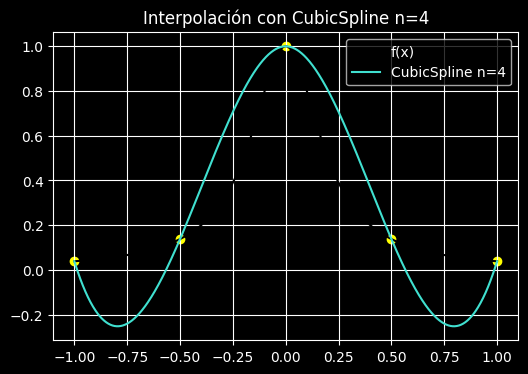

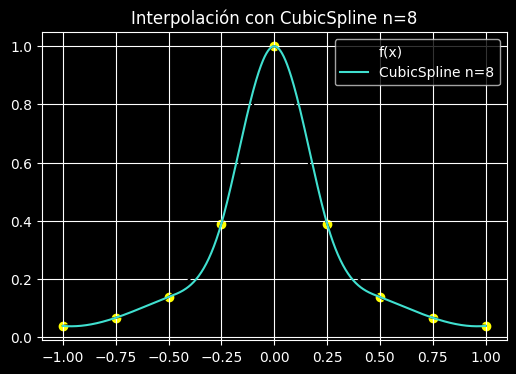

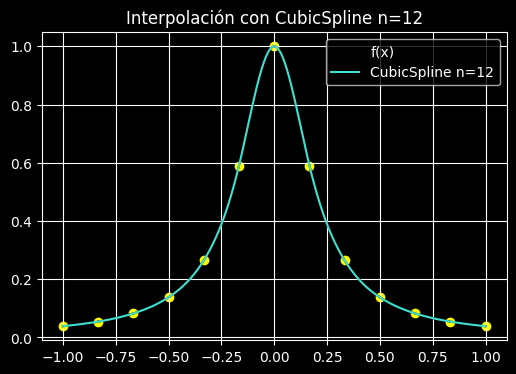

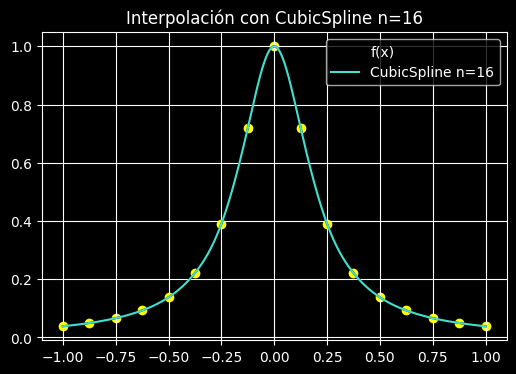

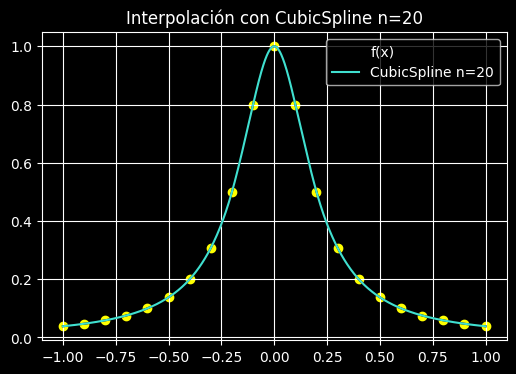

In [79]:
for n in n_vals:
    x_s = np.linspace(-1, 1, n + 1)
    y_s = funcion(x_s)

    spline = CubicSpline(x_s, y_s)
    y_spline = spline(x_vals)

    plt.figure(figsize=(6,4))
    plt.plot(x_vals, y_vals, 'k', label='f(x)')
    plt.plot(x_vals, y_spline, label=f'CubicSpline n={n}', color= 'turquoise')
    plt.scatter(x_s, y_s, c='yellow')
    plt.title(f'Interpolación con CubicSpline n={n}')
    plt.legend()
    plt.grid(True)
    plt.show()


Interpolación de Lagrange sufre del fenómeno de Runge a medida que n aumenta. Es decir, el error aumenta drásticamente para polinomios de grado alto debido a oscilaciones cerca de los extremos del intervalo.


Interpolación con Hermite Cubic Spline es estable: No se evidencia el fenómeno de Runge

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

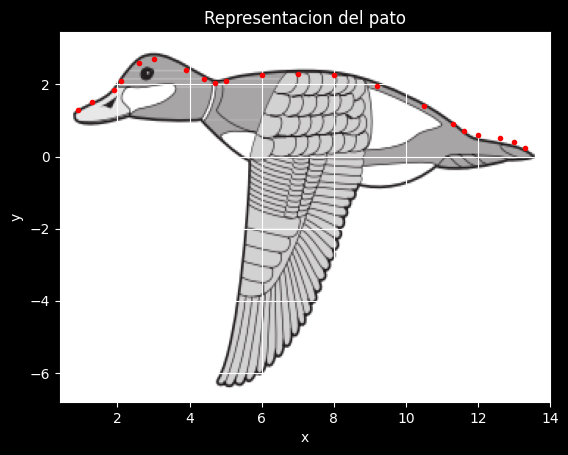

In [88]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.style.use('dark_background')
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [89]:
xp = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
yp = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

x_s = np.linspace(xp[0], xp[-1], 500)
y_linear = np.interp(x_s, xp, yp)

polinomio_lagrange = lagrange(xp, yp)
y_lagrange = polinomio_lagrange(x_s)

spline = CubicSpline(xp, yp)
y_spline = spline(x_s)


<ipython-input-90-4062543679>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_s, y_linear, 'b--', label='Interpolación lineal', color='yellow')
<ipython-input-90-4062543679>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g:" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_s, y_lagrange, 'g:', label='Lagrange', color='turquoise')
<ipython-input-90-4062543679>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(x_s, y_spline, 'm-', label='Spline cúbico', color='green')


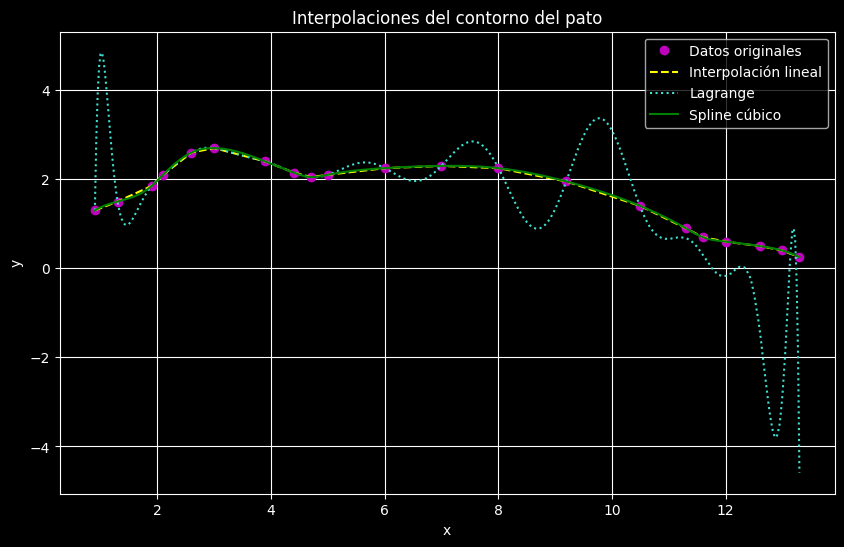

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(xp, yp, 'mo', label='Datos originales')
plt.plot(x_s, y_linear, 'b--', label='Interpolación lineal', color='yellow')
plt.plot(x_s, y_lagrange, 'g:', label='Lagrange', color='turquoise')
plt.plot(x_s, y_spline, 'm-', label='Spline cúbico', color='green')

plt.title('Interpolaciones del contorno del pato')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Conclusión:
La interpolación lineal sigue los puntos con exactitud pero genera ciertas oscilaciones en las esquinas.
La interpolación de Lagrange puede presentar oscilaciones notables, especialmente hacia los extremos del intervalo, debido al fenómeno de Runge.
En cambio, la interpolación con splines cúbicos ofrece una curva suave que ajusta muy bien el contorno del pato sin generar oscilaciones extrañas,este es un buen metodo para utilizar.

# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.